### Download, process, and upload training data

In [2]:
from datetime import datetime as dt

BBOXES = {
    'south':  [29.296298, -1.582263, 29.769293, -1.197520],
    'central': [29.242740, -0.807347, 29.629208, -0.591585],
    'testing': [29.479746, -0.724323, 29.624479, -0.559775]
}

DATES = [
    (dt(2020, 1, 1),  dt(2020, 3, 1),  10),
    (dt(2020, 4, 1),  dt(2020, 6, 1),  10),
    (dt(2020, 7, 1),  dt(2020, 9, 1),  10),
    (dt(2020, 10, 1), dt(2020, 12, 1), 10),

    (dt(2021, 1, 1),  dt(2021, 3, 1),  10),
    (dt(2021, 4, 1),  dt(2021, 6, 1),  10),
    (dt(2021, 7, 1),  dt(2021, 9, 1),  10),
    (dt(2021, 10, 1), dt(2021, 12, 1), 10),

    (dt(2022, 1, 1),  dt(2022, 3, 1),  10),
    (dt(2022, 4, 1),  dt(2022, 6, 1),  10),
    (dt(2022, 7, 1),  dt(2022, 9, 1),  10),
    (dt(2022, 10, 1), dt(2022, 12, 1), 10),
]

In [8]:
%reload_ext autoreload
%autoreload 2

import common.utilities.download as download

bbox = BBOXES['testing']
collection = download.get_collection(DATES[0][0], DATES[0][1], bbox, './data/testing/s2_collection.json', max_cloud_cover=30)

./data/testing/s2_collection.json: {'QV': 3}


In [9]:
%reload_ext autoreload
%autoreload 2

import common.utilities.download as download

composites = download.get_processed_composites(collection, bbox, './data/testing')

downloading... S2A_35MQV_20200123_0_L2A
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/1/S2A_35MQV_20200123_0_L2A/SCL.tif
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/1/S2A_35MQV_20200123_0_L2A/B02.tif
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/1/S2A_35MQV_20200123_0_L2A/B03.tif
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/1/S2A_35MQV_20200123_0_L2A/B04.tif
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/1/S2A_35MQV_20200123_0_L2A/B08.tif
downloading... S2B_35MQV_20200207_0_L2A
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/2/S2B_35MQV_20200207_0_L2A/SCL.tif
download: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/35/M/QV/2020/2/S2B_35MQV_20200207_0_L2A/B02.tif
download: https://sentin

In [12]:
%reload_ext autoreload
%autoreload 2

import common.utilities.imagery as imagery


scenes = ['S2A_35MQV_20200123_0_L2A', 'S2B_35MQV_20200207_0_L2A']

src_dir = './data/testing'

for scene in scenes:
    band_paths = [f'{src_dir}/{scene}/B04_masked.tif', f'{src_dir}/{scene}/B03_masked.tif', f'{src_dir}/{scene}/B02_masked.tif']
    
    rgb_uint16_vrt_path = f'{src_dir}/{scene}/rgb_uint16.vrt'
    imagery.create_vrt(band_paths, rgb_uint16_vrt_path)

    rgb_byte_vrt_path = f'{src_dir}/{scene}/rgb_byte.vrt'
    imagery.create_byte_vrt(rgb_uint16_vrt_path, rgb_byte_vrt_path)
    
    rgb_byte_tif_path = f'{src_dir}/{scene}/{scene}_rgb_byte_cog.tif'
    print(rgb_byte_tif_path)
    imagery.create_tif(rgb_byte_vrt_path, rgb_byte_tif_path, isCog=True)


./data/testing/S2A_35MQV_20200123_0_L2A/S2A_35MQV_20200123_0_L2A_rgb_byte_cog.tif
./data/testing/S2B_35MQV_20200207_0_L2A/S2B_35MQV_20200207_0_L2A_rgb_byte_cog.tif


In [51]:
%run _imagery.ipynb

rgb_band_paths = [composites['B04'], composites['B03'], composites['B02']]

rgb_uint16_vrt_path = './data/testing/rgb_uint16.vrt'
create_vrt(rgb_band_paths, rgb_uint16_vrt_path)

rgb_byte_vrt_path = './data/testing/rgb_byte.vrt'
create_byte_vrt(rgb_uint16_vrt_path, rgb_byte_vrt_path)

rgb_byte_tif_path = './data/testing/rgb_byte_cog.tif'
create_tif(rgb_byte_vrt_path, rgb_byte_tif_path, isCog=True)

In [52]:
%run _imagery.ipynb

all_band_paths = [composites[band] for band in composites]

all_uint16_vrt_path = './data/testing/all_uint16.vrt'
create_vrt(all_band_paths, all_uint16_vrt_path)

all_uint16_tif_path = './data/testing/all_uint16.tif'
create_tif(all_uint16_vrt_path, all_uint16_tif_path, isCog=False)

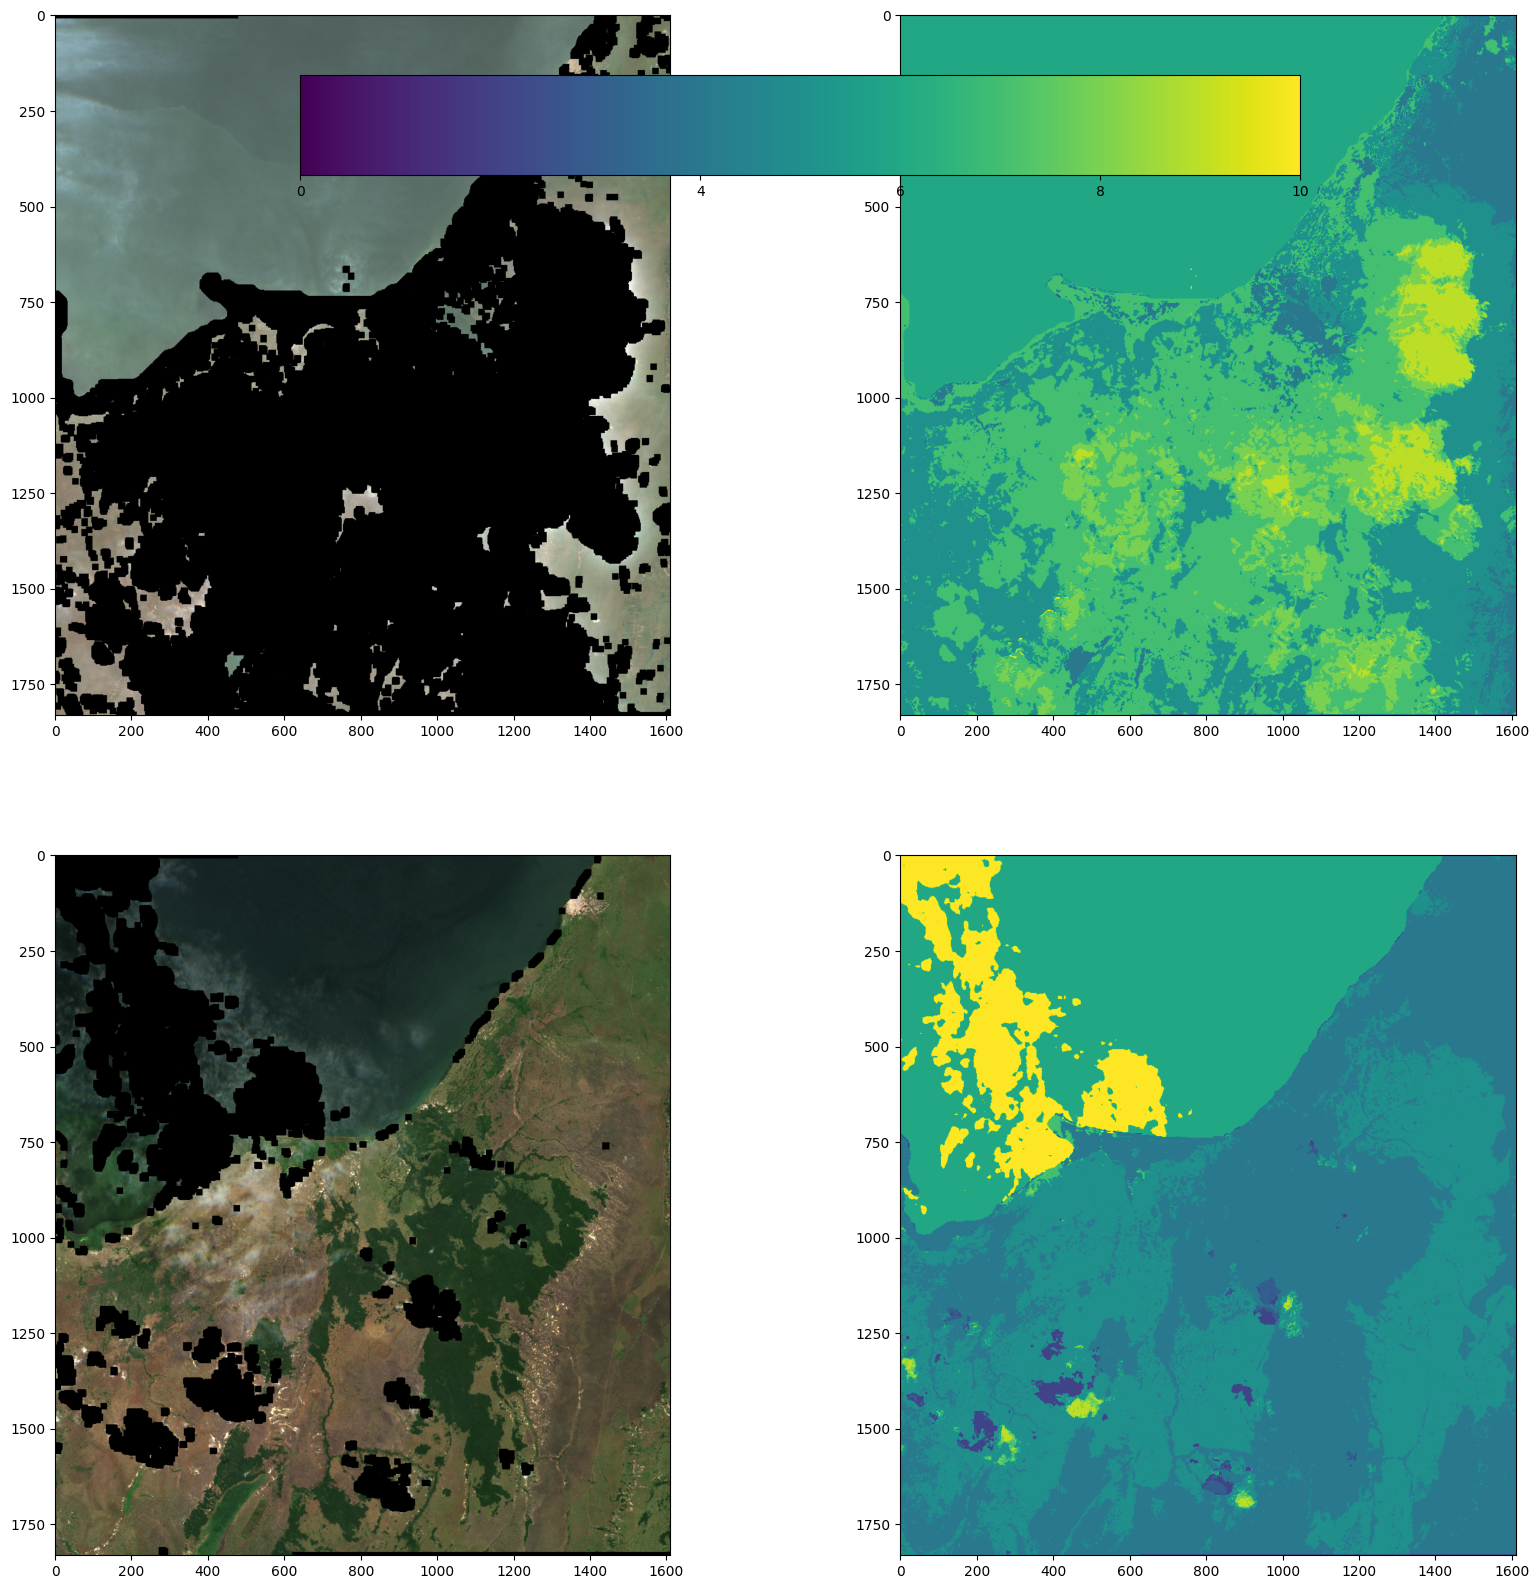

In [53]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show


rgb1 = "./data/testing/S2A_35MQV_20200123_0_L2A/S2A_35MQV_20200123_0_L2A_rgb_byte_cog.tif"
scl1 = "./data/testing/S2A_35MQV_20200123_0_L2A/SCL.tif"
rgb2 = "./data/testing/S2B_35MQV_20200207_0_L2A/S2B_35MQV_20200207_0_L2A_rgb_byte_cog.tif"
scl2 = "./data/testing/S2B_35MQV_20200207_0_L2A/SCL.tif"

fig, (row1, row2) = plt.subplots(2, 2, figsize=(20, 20))

cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

show(rasterio.open(rgb1).read(), ax=row1[0])
im1 = row1[1].imshow(rasterio.open(scl1).read(1))
fig.colorbar(im1, cax=cax, orientation='horizontal')

show(rasterio.open(rgb2).read(), ax=row2[0])
row2[1].imshow(rasterio.open(scl2).read(1))

plt.show()

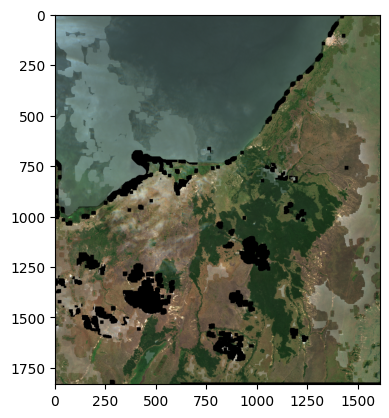

<AxesSubplot: >

In [54]:
from rasterio.plot import show

rgb_byte_cog_path = "./data/testing/rgb_byte_cog.tif"
show(rasterio.open(rgb_byte_cog_path).read())
